In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from dataset import *
from models import *
from matplotlib import pyplot as plt
import os

In [2]:
# Путь к папкам с изображениями и масками
train_image_dir = 'C:/Users/mrxyz/Documents/MYProject/YndSpecProject/data/train_images'
train_mask_dir = 'C:/Users/mrxyz/Documents/MYProject/YndSpecProject/data/train_lung_masks'

# Создание экземпляров DataLoader и нейронной сети
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset = LungDataset(train_image_dir, train_mask_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model = LungMaskGenerator().to(device)
c = torch.load('C:/Users/mrxyz/Documents/MYProject/YndSpecProject/Experiments/vae/Checkpoints/lung_mask_generator10.pth', map_location=device)
model.load_state_dict(c)


<All keys matched successfully>

In [5]:
model = LungMaskGeneratorV2().to(device)
c2 = torch.load('C:/Users/mrxyz/Documents/MYProject/YndSpecProject/Experiments/vae/Checkpoints/lung_mask_generatorV26.pth', map_location=device)
model.load_state_dict(c2)

<All keys matched successfully>

In [6]:
model = LungMaskGeneratorV3().to(device)
c3 = torch.load('C:/Users/mrxyz/Documents/MYProject/YndSpecProject/Experiments/vae/Checkpoints/lung_mask_generatorV311.pth', map_location=device)
model.load_state_dict(c3)

<All keys matched successfully>

In [7]:
model = LungMaskGeneratorV4().to(device)
c4 = torch.load('C:/Users/mrxyz/Documents/MYProject/YndSpecProject/Experiments/vae/Checkpoints/lung_mask_generatorV414.pth', map_location=device)
model.load_state_dict(c4)

<All keys matched successfully>

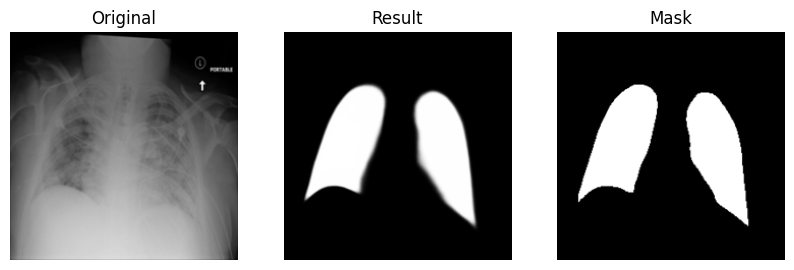

In [8]:
model.eval()

with torch.no_grad():
    inputs = next(iter(dataloader))
    images = inputs[0].to(device)
    masks = inputs[1].to(device)
    outputs = model(images)

    input_img = transforms.ToPILImage()(images[0].squeeze())
    output_img = transforms.ToPILImage()(outputs[0].squeeze())
    masks = transforms.ToPILImage()(masks[0].squeeze())
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    axes[0].imshow(input_img)
    axes[0].set_title("Original")
    axes[0].axis("off")
    
    axes[1].imshow(output_img, cmap='gray')
    axes[1].set_title("Result")
    axes[1].axis("off")

    axes[2].imshow(masks, cmap='gray')
    axes[2].set_title("Mask")
    axes[2].axis("off")


In [9]:
test_dataset = LungTestDataset(image_dir='C:/Users/mrxyz/Documents/MYProject/YndSpecProject/data/test_images', transform=transform)

test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)

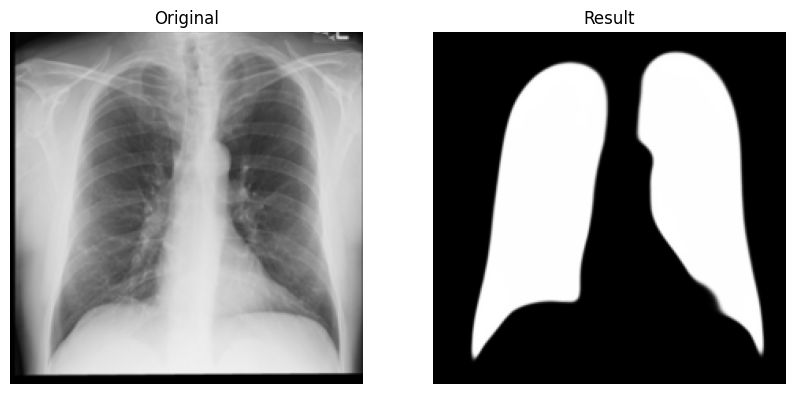

In [10]:
model.eval()

with torch.no_grad():
    inputs = next(iter(test_loader))
    images = inputs.to(device)
    outputs = model(images)

    input_img = transforms.ToPILImage()(images[0].squeeze())
    output_img = transforms.ToPILImage()(outputs[0].squeeze())
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(input_img)
    axes[0].set_title("Original")
    axes[0].axis("off")
    
    axes[1].imshow(output_img, cmap='gray')
    axes[1].set_title("Result")
    axes[1].axis("off")


In [11]:
x = torch.randn(4, 3, 224, 224, requires_grad=True)
torch_out = model(x)

torch.onnx.export(
    model,
      x,
        "model.onnx",
          export_params=True,
            opset_version=11,
              do_constant_folding=True,
                input_names = ['input'],
                  output_names = ['output'],
                    dynamic_axes = {'input' : {0: 'batch_size'}, 'output': {0: 'batch_size'}})